In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_predict,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report,confusion_matrix


In [2]:
df =sns.load_dataset('iris')

In [3]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()


,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [5]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [6]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

Documentations on each:

* [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

  Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
  
  
  
* [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

  C-Support Vector Classification.
  
  The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.

In [13]:
C = 1.0
clf = SVC(kernel='linear',C=C)

In [15]:
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [16]:
clf.predict([[6,2]])

array([2])

In [17]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

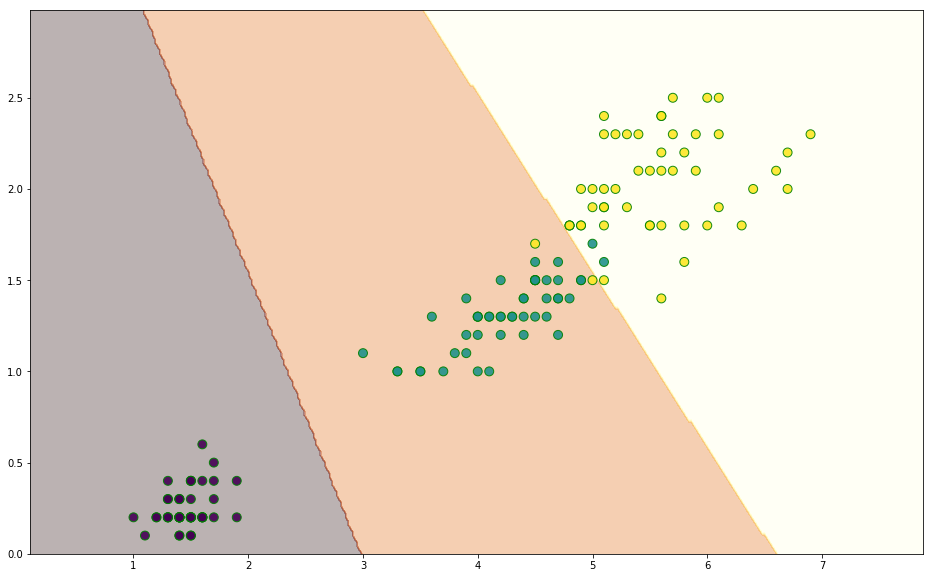

In [18]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

#### Linear SVM implementation

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Scale features

In [22]:
sc_x = StandardScaler()
X_std_train= sc_x.fit_transform(X_train)

In [23]:
C = 1.0
clf = SVC(kernel='linear',C=C)
clf.fit(X_std_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

##### cross validation within train dataset

In [24]:
res = cross_val_score(clf,X_std_train,y_train,cv=10,scoring='accuracy')
print("Average Accuracy \t {0:.4f}".format(np.mean(res)))
print("Average SD \t {0:.4f}".format(np.std(res)))

Average Accuracy 	 0.9501
Average SD 	 0.0538


<h6>Documentation:</h6>
source:<link>https://stackoverflow.com/questions/43613443/difference-between-cross-val-score-and-cross-val-predict</link>


cross_val_score returns score of test fold where cross_val_predict returns predicted y values for the test fold.

For the cross_val_score(), you are using the average of the output, which will be affected by the number of folds because then it may have some folds which may have high error (not fit correctly).

Whereas, cross_val_predict() returns, for each element in the input, the prediction that was obtained for that element when it was in the test set. [Note that only cross-validation strategies that assign all elements to a test set exactly once can be used]. So the increasing the number of folds, only increases the training data for the test element, and hence its result may not be affected much.



In [25]:
y_train_pred = cross_val_predict(clf,X_std_train,y_train,cv=3)

In [26]:
confusion_matrix(y_train,y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]])

In [27]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.92      0.92      0.92        37
           2       0.93      0.93      0.93        44

   micro avg       0.95      0.95      0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



##### cross validation within train dataset

In [28]:
y_test_pred = cross_val_predict(clf,sc_x.transform(X_test),y_test,cv=3)

In [29]:
confusion_matrix(y_test,y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]])

In [30]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.87      1.00      0.93        13
           2       1.00      0.67      0.80         6

   micro avg       0.93      0.93      0.93        30
   macro avg       0.96      0.89      0.91        30
weighted avg       0.94      0.93      0.93        30



### Polynomial kernel

In [31]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_std_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        random_state=0)

#### Scale Features

In [32]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [33]:
C =1.0
clf = SVC(kernel='poly', degree=5, C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Cross Validation within Train Dataset

In [34]:
res = cross_val_score(clf,X_std_train,y_train,cv=10,scoring='accuracy')
print("Average Accuracy \t {0:.4f}".format(np.mean(res)))
print("Average SD \t {0:.4f}".format(np.std(res)))

Average Accuracy 	 0.9371
Average SD 	 0.0900


In [35]:
y_train_pred = cross_val_predict(clf,X_std_train,y_train,cv=3)

In [36]:
confusion_matrix(y_train,y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0, 10, 34]])

In [37]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.79      1.00      0.88        37
           2       1.00      0.77      0.87        44

   micro avg       0.92      0.92      0.92       120
   macro avg       0.93      0.92      0.92       120
weighted avg       0.93      0.92      0.92       120



In [38]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9344
Recall Score: 		 0.9167
F1 Score: 		 0.9163


#### Cross Validation within Test Dataset

In [39]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [40]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  4,  2]])

In [41]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.8980
Recall Score: 		 0.8667
F1 Score: 		 0.8422


***
# 4. Gaussian Radial Basis Function (rbf)

The kernel function can be any of the following:

* linear: $\langle x, x'\rangle$.


* polynomial: $(\gamma \langle x, x'\rangle + r)^d$. 

  $d$ is specified by keyword `degree`
  
  $r$ by `coef0`.


* rbf: $\exp(-\gamma \|x-x'\|^2)$. 

  $\gamma$ is specified by keyword `gamma` must be greater than 0.


* sigmoid $(\tanh(\gamma \langle x,x'\rangle + r))$

  where $r$ is specified by `coef0`.
  
[scikit-learn documentation](http://scikit-learn.org/stable/modules/svm.html#svm)

In [42]:
C = 1.0
clf = SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Cross Validation within Train Dataset

In [43]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9501
Accuracy SD: 		 0.0538


In [44]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [45]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]])

In [46]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9586
Recall Score: 		 0.9583
F1 Score: 		 0.9584


### Grid Search

In [60]:
from sklearn.pipeline import Pipeline


In [61]:
pipeline = Pipeline([('clf',SVC(kernel='rbf',C=1,gamma=0.1))])

In [68]:
params = {'clf_C':(0.1,0.5,1,2,5,10,20),'clf_gamma':(0.001,0.01,0.1,0.25,0.5,0.75,1)}


In [69]:
svm_grid_rbf= GridSearchCV(pipeline,params,n_jobs=1,cv=3,verbose=1,scoring='accuracy')

In [70]:

svm_grid_rbf.fit(X_train, y_train) 

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter clf_C for estimator Pipeline(memory=None,
     steps=[('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [65]:
svm_grid_rbf.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [59]:
svm_grid_rbf.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [111]:
best = svm_grid_rbf.best_estimator_.get_params

In [117]:
best

<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('clf', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])>

###### validation in the test dataset

In [118]:
y_test_pred = svm_grid_rbf.predict(X_test)

In [119]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [121]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test, y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test, y_test_pred, 
                                             average='weighted')))

Precision Score: 	 1.0000
Recall Score: 		 1.0000
F1 Score: 		 1.0000


>> Overfitting